#Data Analysis on the experiment performed using CNN on the Wiki data-set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df_original = pd.read_csv("WikiSample.csv")
df_estimated = pd.read_csv("WikiSample_estimated.csv") 
df_analysis = df_original[['path','AgeGroup','gender']].copy()
df_analysis['AgeGroup_estimated'] = df_estimated['Age']
df_analysis['gender_estimated'] = df_estimated['Gender'].str.lower()
df_analysis = df_analysis.dropna()
df_analysis.head(10)

,path,AgeGroup,gender,AgeGroup_estimated,gender_estimated
0,wiki_crop/01/5638201_1987-04-09_2008.jpg,"(15, 20)",male,"(25, 32)",male
1,wiki_crop/29/17736629_1986-04-11_2015.jpg,"(25, 32)",male,"(25, 32)",male
2,wiki_crop/12/1474512_1977-07-28_2006.jpg,"(25, 32)",male,"(25, 32)",male
3,wiki_crop/46/9308646_1966-08-23_2006.jpg,"(38, 43)",male,"(38, 43)",male
4,wiki_crop/44/7062344_1963-08-21_2013.jpg,"(48, 53)",male,"(25, 32)",female
5,wiki_crop/93/2440593_1980-08-11_2007.jpg,"(25, 32)",female,"(25, 32)",male
6,wiki_crop/91/3296491_1955-07-15_2007.jpg,"(48, 53)",male,"(48, 53)",male
7,wiki_crop/53/3289053_1951-05-02_2012.jpg,"(60, 100)",male,"(25, 32)",male
8,wiki_crop/10/23830110_1964-07-22_2013.jpg,"(48, 53)",male,"(60, 100)",female
9,wiki_crop/56/14853156_1981-05-28_2009.jpg,"(25, 32)",female,"(48, 53)",male


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


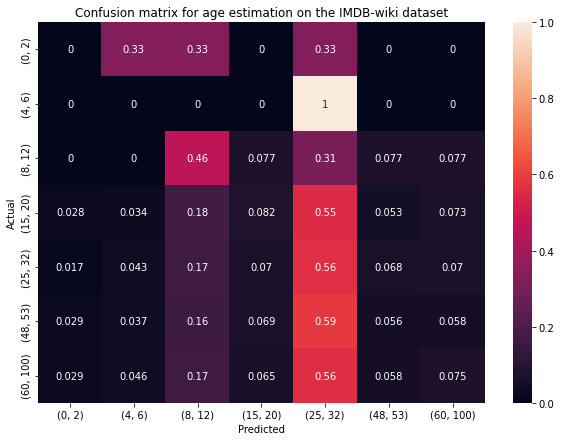

In [5]:
c = pd.crosstab(df_analysis['AgeGroup'], df_analysis['AgeGroup_estimated'], rownames=['Actual'], colnames=['Predicted'])
labels = ['(0, 2)','(4, 6)','(8, 12)', '(15, 20)', '(25, 32)', '(48, 53)', '(60, 100)']
c = c.reindex(labels, axis="columns")
c = c.reindex(labels, axis="index")
cn = c.astype('float') / c.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
sn.heatmap(cn, annot=True)
plt.title('Confusion matrix for age estimation on the IMDB-wiki dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


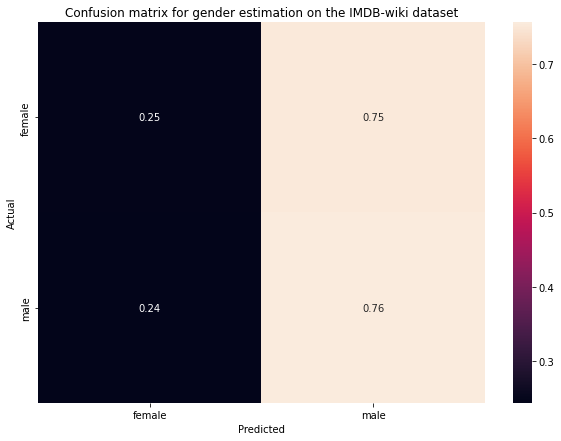

In [6]:
d = pd.crosstab(df_analysis['gender'], df_analysis['gender_estimated'], rownames=['Actual'], colnames=['Predicted'])
dn = d.astype('float') / d.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
sn.heatmap(dn, annot=True)
plt.title('Confusion matrix for gender estimation on the IMDB-wiki dataset')
plt.show()

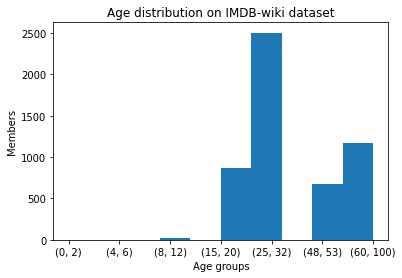

In [7]:
df_aux = pd.DataFrame(df_analysis['AgeGroup'].value_counts().reset_index().values, columns=["AgeGroup", "Value"])
df_aux = df_aux.sort_index(axis = 0, ascending=True)
df_aux.set_index('AgeGroup', inplace=True)
df_aux = df_aux.reindex(labels)
df_aux = df_aux.reset_index(level=0)
plt.hist(df_aux['AgeGroup'], weights= df_aux['Value'])
plt.ylabel('Members')
plt.xlabel('Age groups')
plt.title('Age distribution on IMDB-wiki dataset')
plt.show()

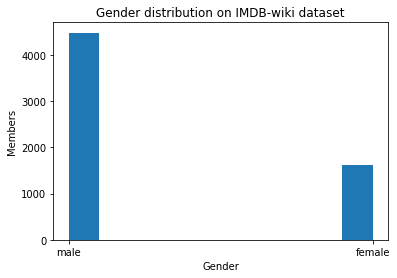

In [8]:
df_analysis['gender'].hist()
plt.ylabel('Members')
plt.xlabel('Gender')
plt.title('Gender distribution on IMDB-wiki dataset')
plt.grid(b=None)
plt.show()